## PROBLEM STATEMENT  
Traditional drug discovery approaches are time-consuming, costly, and often focus on single-target strategies that fail to capture the complexity of biological systems. There is a critical need for computational methods that can analyze protein interaction networks at a systems level to identify key regulatory proteins and enable efficient drug repurposing. Existing datasets of protein–protein interactions and approved drugs remain underutilized for discovering novel therapeutic opportunities.

## AIM AND OBJECTIVES  
The aim of this project is to apply graph-based network analysis to disease-specific protein–protein interaction networks for identifying potential drug repurposing targets. The objectives include constructing PPI networks, analyzing network centrality measures to detect hub proteins, identifying functional modules within the network, and mapping existing drugs to these key proteins to propose new therapeutic indications.

## NOVELTY AND INDUSTRIAL RELEVANCE  
This project introduces a systems biology-driven, graph-theoretical framework for drug repurposing, moving beyond conventional gene-centric analysis. The use of network centrality, community detection, and scalable Python-based implementation reflects methodologies adopted in pharmaceutical R&D and biotech startups. The approach is computationally efficient, reproducible, and aligned with modern data-driven drug discovery pipelines.

## EXPECTED OUTCOMES  
The expected outcomes include the identification of biologically significant hub proteins involved in disease mechanisms, visualization of functional protein interaction modules, and a prioritized list of candidate drugs for repurposing. The project delivers interpretable network-based insights that can support hypothesis generation for experimental validation and translational research.


PPI DATA PREVIEW


,ProteinA,ProteinB,ConfidenceScore
0,TP53,BRCA1,0.95
1,TP53,EGFR,0.90
2,BRCA1,RAD51,0.92
3,EGFR,AKT1,0.88
4,AKT1,MTOR,0.91
5,BRCA1,TP53,0.93
6,EGFR,PIK3CA,0.89
7,AKT1,TP53,0.94



Total Proteins (Nodes): 7
Total Interactions (Edges): 7

TOP HUB PROTEINS


,Protein,Degree,Betweenness,Closeness,Eigenvector
0,TP53,0.500000,0.533333,0.666667,0.534968
2,EGFR,0.500000,0.333333,0.600000,0.520315
4,AKT1,0.500000,0.333333,0.600000,0.520315
1,BRCA1,0.333333,0.333333,0.500000,0.263773
3,RAD51,0.166667,0.000000,0.352941,0.108181
5,MTOR,0.166667,0.000000,0.400000,0.213394
6,PIK3CA,0.166667,0.000000,0.400000,0.213394


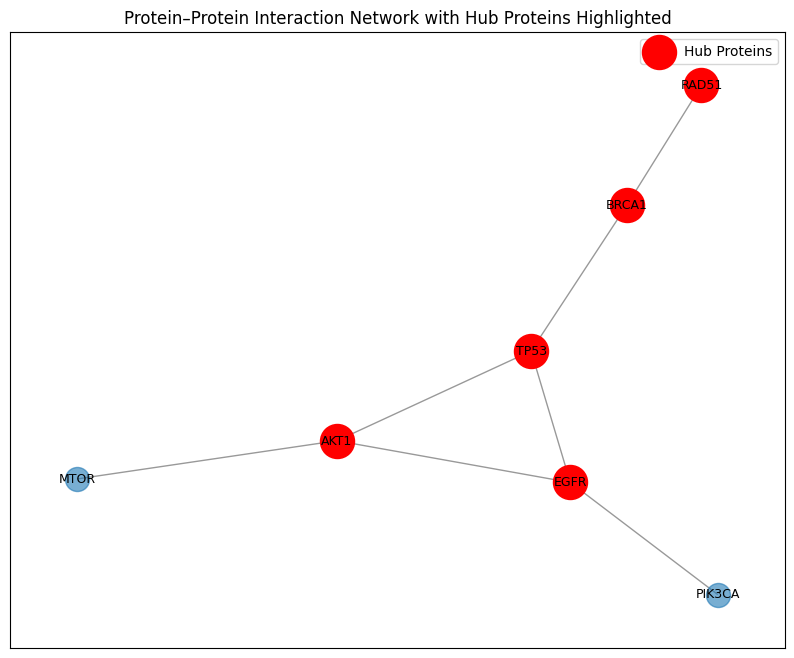


Number of Detected Modules: 3
Module 1: ['TP53', 'RAD51', 'BRCA1']
Module 2: ['MTOR', 'AKT1']
Module 3: ['PIK3CA', 'EGFR']

CANDIDATE DRUG REPURPOSING SUGGESTIONS


,Drug,TargetProtein,OriginalIndication
0,Erlotinib,EGFR,Lung Cancer
1,Olaparib,BRCA1,Ovarian Cancer
3,Gefitinib,EGFR,Lung Cancer


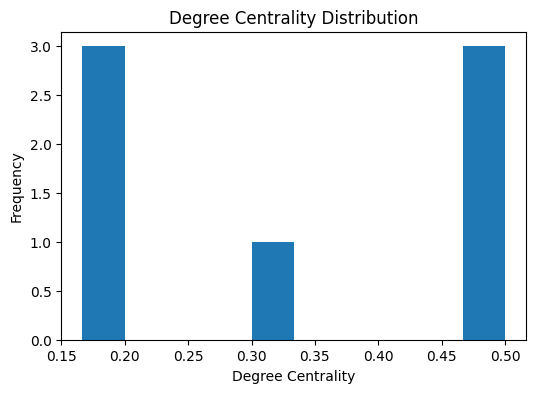

In [1]:
# ================================
# GRAPH-BASED PPI ANALYSIS PIPELINE
# ================================

# 1️ INSTALL & IMPORT LIBRARIES
!pip install networkx pandas matplotlib numpy

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 2️ LOAD SAMPLE DATA
# -------------------------------

# Sample PPI data (replace with real STRING/BioGRID data later)
ppi_data = {
    "ProteinA": ["TP53", "TP53", "BRCA1", "EGFR", "AKT1", "BRCA1", "EGFR", "AKT1"],
    "ProteinB": ["BRCA1", "EGFR", "RAD51", "AKT1", "MTOR", "TP53", "PIK3CA", "TP53"],
    "ConfidenceScore": [0.95, 0.90, 0.92, 0.88, 0.91, 0.93, 0.89, 0.94]
}

ppi_df = pd.DataFrame(ppi_data)

# Filter high-confidence interactions
ppi_df = ppi_df[ppi_df["ConfidenceScore"] >= 0.85]

print("PPI DATA PREVIEW")
display(ppi_df)

# -------------------------------
# 3️ BUILD PPI NETWORK
# -------------------------------

G = nx.Graph()

for _, row in ppi_df.iterrows():
    G.add_edge(row["ProteinA"], row["ProteinB"], weight=row["ConfidenceScore"])

print(f"\nTotal Proteins (Nodes): {G.number_of_nodes()}")
print(f"Total Interactions (Edges): {G.number_of_edges()}")

# -------------------------------
# 4️ CENTRALITY ANALYSIS
# -------------------------------

degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)

centrality_df = pd.DataFrame({
    "Protein": degree.keys(),
    "Degree": degree.values(),
    "Betweenness": betweenness.values(),
    "Closeness": closeness.values(),
    "Eigenvector": eigenvector.values()
})

centrality_df = centrality_df.sort_values("Degree", ascending=False)

print("\nTOP HUB PROTEINS")
display(centrality_df)

hub_proteins = centrality_df.head(5)["Protein"].tolist()

# -------------------------------
# 5️ NETWORK VISUALIZATION
# -------------------------------

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos, node_size=300, alpha=0.6)

nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=hub_proteins,
    node_color="red",
    node_size=600,
    label="Hub Proteins"
)

nx.draw_networkx_labels(G, pos, font_size=9)
plt.title("Protein–Protein Interaction Network with Hub Proteins Highlighted")
plt.legend()
plt.show()

# -------------------------------
# 6️ COMMUNITY / MODULE DETECTION
# -------------------------------

communities = nx.community.greedy_modularity_communities(G)

print(f"\nNumber of Detected Modules: {len(communities)}")

for i, module in enumerate(communities, 1):
    print(f"Module {i}: {list(module)}")

# -------------------------------
# 7️ DRUG REPURPOSING MAPPING
# -------------------------------

# Sample drug–target data (replace with DrugBank later)
drug_data = {
    "Drug": ["Erlotinib", "Olaparib", "Rapamycin", "Gefitinib"],
    "TargetProtein": ["EGFR", "BRCA1", "MTOR", "EGFR"],
    "OriginalIndication": ["Lung Cancer", "Ovarian Cancer", "Immunosuppression", "Lung Cancer"]
}

drug_df = pd.DataFrame(drug_data)

repurposed_df = drug_df[drug_df["TargetProtein"].isin(hub_proteins)]

print("\nCANDIDATE DRUG REPURPOSING SUGGESTIONS")
display(repurposed_df)

# -------------------------------
# 8️ DEGREE DISTRIBUTION PLOT
# -------------------------------

plt.figure(figsize=(6, 4))
plt.hist(list(degree.values()), bins=10)
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")
plt.title("Degree Centrality Distribution")
plt.show()


